In [148]:
from PIL import Image
import os
import random
from torch.utils.data  import Dataset, DataLoader
from torchvision import transforms 
to_tensor = transforms.ToTensor()

In [149]:
def resize_img(img,max_width = 400):
    w,h = img.size
    max_height = int(h / w * max_width)
    img = img.resize((max_width,max_height),Image.ANTIALIAS)
    return img

def get_random_pos(big_box,small_box):
    bw,bh = big_box
    sw,sh = small_box
    x = random.randrange(0,bw-sw)
    y = random.randrange(0,bh-sh)
    return(x,y)

class myDataset(Dataset):
    def __init__(self, path_org = 'data/pictures', path_wm = 'data/watermarks',n = 10):
        super().__init__()
        self.n = n
        self.path_org = path_org
        self.path_wm = path_wm
        self.imglist= [x for x in os.listdir(self.path_org) if x.endswith('.jpeg')]
        self.imglist_size = len(self.imglist)
        self.wmlist = [x for x in os.listdir(self.path_wm) if x.endswith('.png')]
        self.wmlist_size = len(self.wmlist)

    def __len__(self):
        return self.n
       
    def __getitem__(self,idx):
        ix = random.randrange(0,self.imglist_size)
        iwm = random.randrange(0,self.wmlist_size)

        img = Image.open(os.path.join(self.path_org,self.imglist[ix])).convert("RGB")
        img = resize_img(img)
        imgwm = Image.open(os.path.join(self.path_wm,self.wmlist[iwm]))
        imgwm = imgwm if imgwm.size[0] <100 else resize_img(imgwm,150)
        imgwm = imgwm.convert("RGBA")
        r,g,b,a = imgwm.split()

        x,y = get_random_pos(img.size,(200,200))
        img = img.crop((x,y,x+200,y+200))

        target = Image.new("RGBA",(200,200),(0,0,0,0))
        target.paste(img,(0,0))

        x,y = get_random_pos((200,200),imgwm.size)
        target.paste(imgwm,(x,y),a)

        src_t = to_tensor(img)
        wm_t = to_tensor(target)
        return {"src":img, "wm":target}
        #return {"src_t":src_t, "wm_t":wm_t}


In [150]:
a = myDataset()

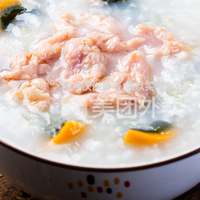

In [151]:
a[0]['wm']